In [1]:
from hopfield import Hopfield, displayPatterns, exportPatterns
from letters5x5 import *
import numpy as np
import pandas as pd
import itertools

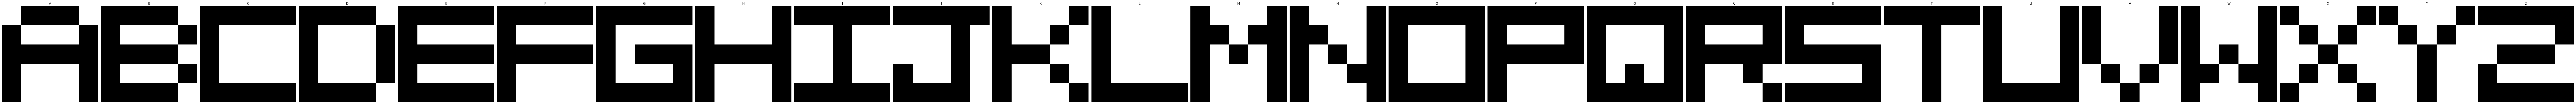

In [6]:


letters = [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q,
           r, s, t, u, v, w, x, y, z]

displayPatterns(letters, ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])



In [8]:
letters_dict = {}
current_letter = 65 # ASCII code for 'A'
for letter in letters:
    letters_dict[chr(current_letter)] = letter
    current_letter += 1

all_groups = list(itertools.combinations(letters_dict.keys(), r=4))
avg_dot_product = []
max_dot_product = []

for i in range(len(all_groups)):
    group = np.array([v for k,v in letters_dict.items() if k in all_groups[i]])
    orto_matrix = group.dot(group.T)
    np.fill_diagonal(orto_matrix, 0)
    #print(f'{all_groups[i]}\n{orto_matrix}\n-------------------------------------')
    row, _ = orto_matrix.shape
    avg_dot_product.append((np.abs(orto_matrix).sum() / (orto_matrix.size - row), all_groups[i]))
    max_v = np.abs(orto_matrix).max()
    max_dot_product.append(((max_v, np.count_nonzero(np.abs(orto_matrix) == max_v) / 2), all_groups[i]))

df = pd.DataFrame(sorted(avg_dot_product), columns=["|<,>| medio", "grupo"])
df.head(15).style.format({'|<,>| medio': "{:.2f}"}).hide(axis='index')

"|<,>| medio",grupo
1.33,"('L', 'R', 'T', 'X')"
1.67,"('F', 'I', 'U', 'X')"
1.67,"('I', 'L', 'R', 'X')"
1.67,"('I', 'R', 'U', 'X')"
2.00,"('F', 'I', 'L', 'X')"
2.00,"('J', 'L', 'R', 'X')"
2.00,"('J', 'R', 'T', 'X')"
2.00,"('J', 'R', 'U', 'X')"
2.00,"('R', 'T', 'V', 'X')"
2.33,"('D', 'R', 'T', 'V')"


In [9]:
df.tail(15).style.format({'|<,>| medio': "{:.2f}"}).hide(axis='index')

"|<,>| medio",grupo
18.00,"('B', 'E', 'G', 'S')"
18.00,"('C', 'E', 'G', 'O')"
18.00,"('C', 'O', 'Q', 'U')"
18.00,"('E', 'G', 'O', 'Q')"
18.00,"('G', 'O', 'Q', 'S')"
18.00,"('G', 'O', 'Q', 'U')"
18.33,"('C', 'E', 'G', 'S')"
18.33,"('E', 'F', 'P', 'R')"
18.33,"('H', 'M', 'N', 'W')"
18.67,"('A', 'F', 'P', 'R')"


In [10]:
df2 = pd.DataFrame(sorted(max_dot_product), columns=["|<,>| max", "grupo"])
df2.head(15).style.format({'|<,>| max': lambda x: 'max: {:,.0f} | count: {:,.0f}'.format(*x)}).hide(axis='index')

"|<,>| max",grupo
max: 3 | count: 1,"('L', 'R', 'T', 'X')"
max: 3 | count: 2,"('F', 'I', 'U', 'X')"
max: 3 | count: 2,"('I', 'R', 'U', 'X')"
max: 3 | count: 3,"('J', 'R', 'U', 'X')"
max: 5 | count: 1,"('D', 'R', 'T', 'V')"
max: 5 | count: 1,"('F', 'I', 'L', 'X')"
max: 5 | count: 1,"('F', 'I', 'U', 'Y')"
max: 5 | count: 1,"('F', 'J', 'U', 'X')"
max: 5 | count: 1,"('F', 'J', 'U', 'Y')"
max: 5 | count: 1,"('F', 'L', 'T', 'X')"


In [11]:
df3 = df2.merge(df)
df3 = df3[['|<,>| max', '|<,>| medio', 'grupo']]
df3.head(10).style.format({'|<,>| max': lambda x: 'max: {:,.0f} | count: {:,.0f}'.format(*x), '|<,>| medio': "{:.2f}"}).hide(axis='index')

"|<,>| max","|<,>| medio",grupo
max: 3 | count: 1,1.33,"('L', 'R', 'T', 'X')"
max: 3 | count: 2,1.67,"('F', 'I', 'U', 'X')"
max: 3 | count: 2,1.67,"('I', 'R', 'U', 'X')"
max: 3 | count: 3,2.00,"('J', 'R', 'U', 'X')"
max: 5 | count: 1,2.33,"('D', 'R', 'T', 'V')"
max: 5 | count: 1,2.00,"('F', 'I', 'L', 'X')"
max: 5 | count: 1,2.33,"('F', 'I', 'U', 'Y')"
max: 5 | count: 1,2.33,"('F', 'J', 'U', 'X')"
max: 5 | count: 1,2.33,"('F', 'J', 'U', 'Y')"
max: 5 | count: 1,2.33,"('F', 'L', 'T', 'X')"
